In [12]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("dark")
import pandas as pd 

%matplotlib inline


#importing sklearn and libraries
from sklearn.metrics import roc_auc_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [13]:
# data 
df = pd.read_csv("census.csv")

In [14]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [15]:
df.head(5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [16]:
df.isna().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

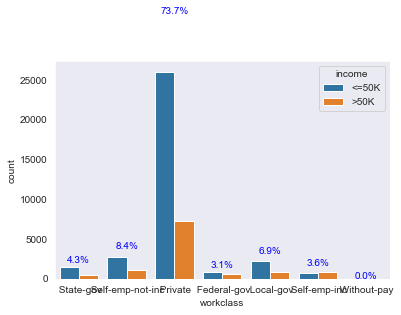

In [17]:
# create the plot

sns.countplot(data = df, x = 'workclass',hue = 'income')
# add annotations
n_points = df.shape[0]
cat_counts = df['workclass'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
# get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
# print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'b')




In [18]:
a = df
a.drop(['age','education-num','capital-gain','capital-loss','hours-per-week'], axis =1)
colum = []
for x in a.columns:
    colum.append(x)


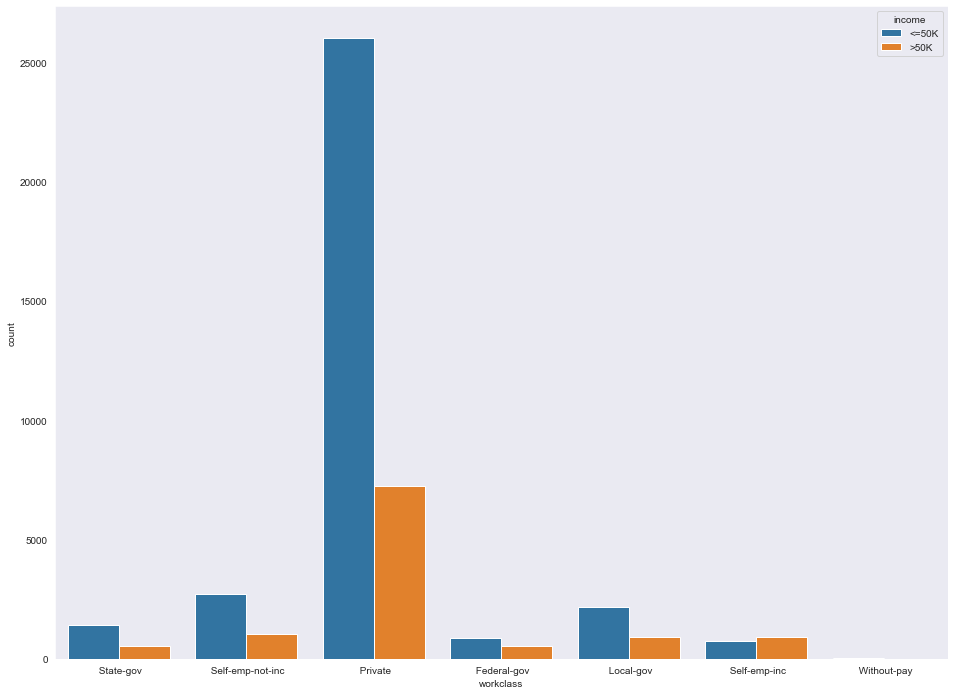

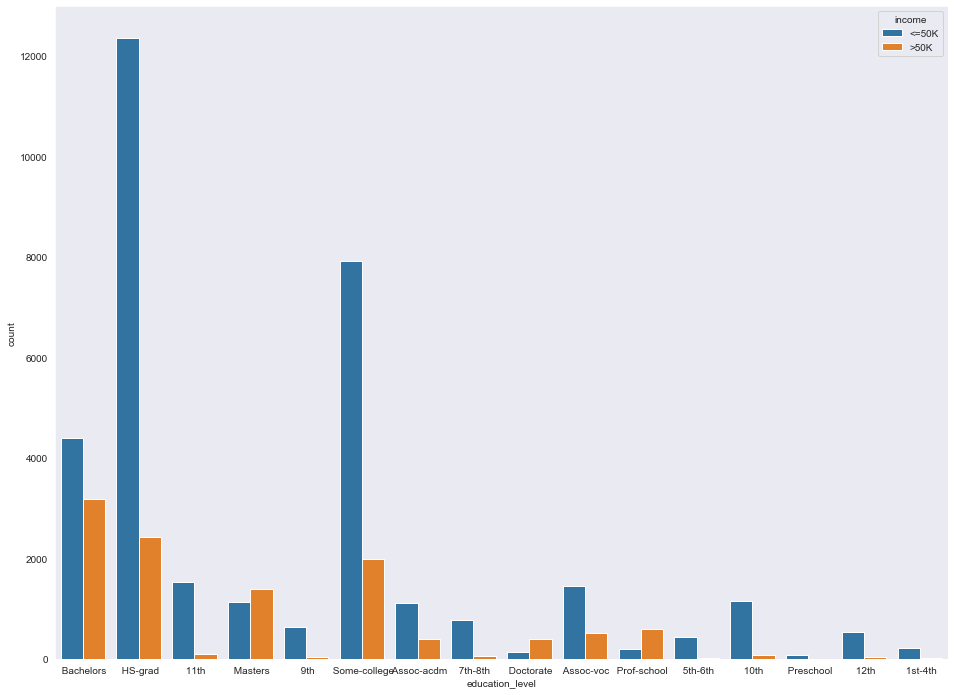

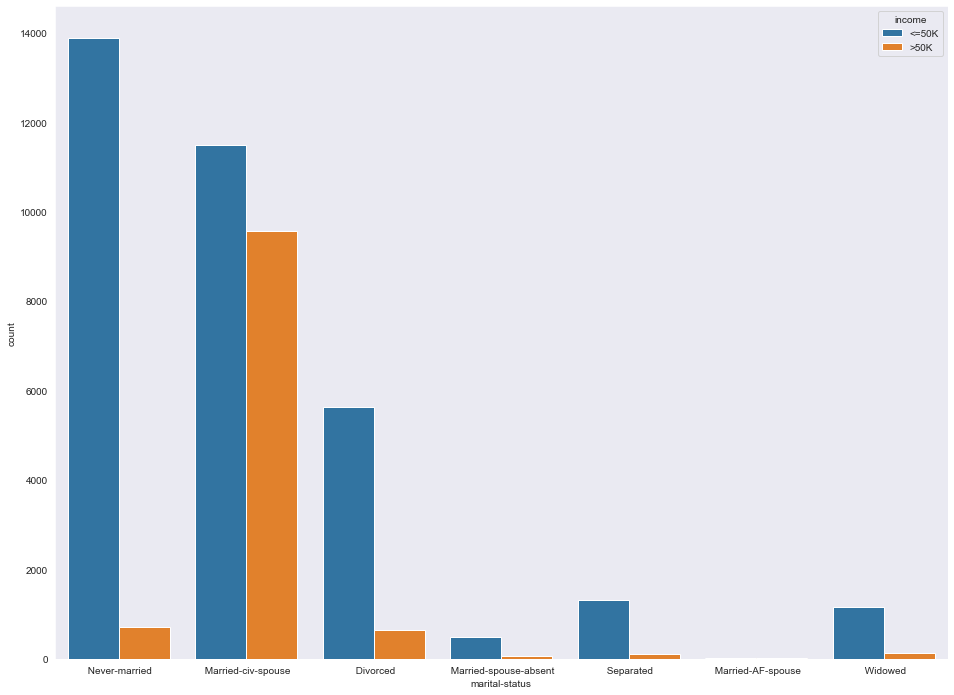

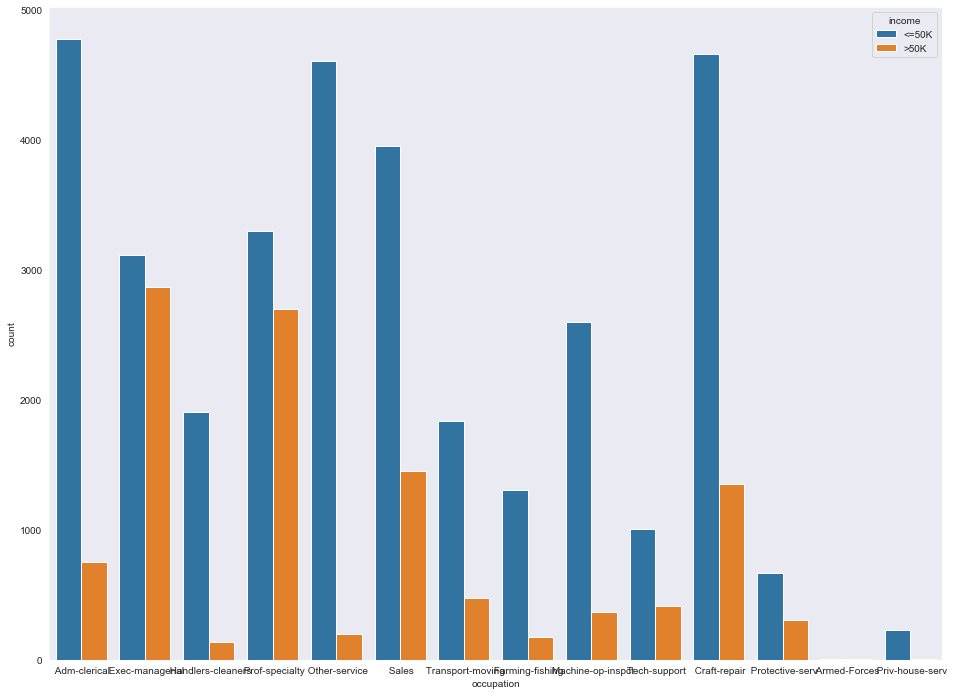

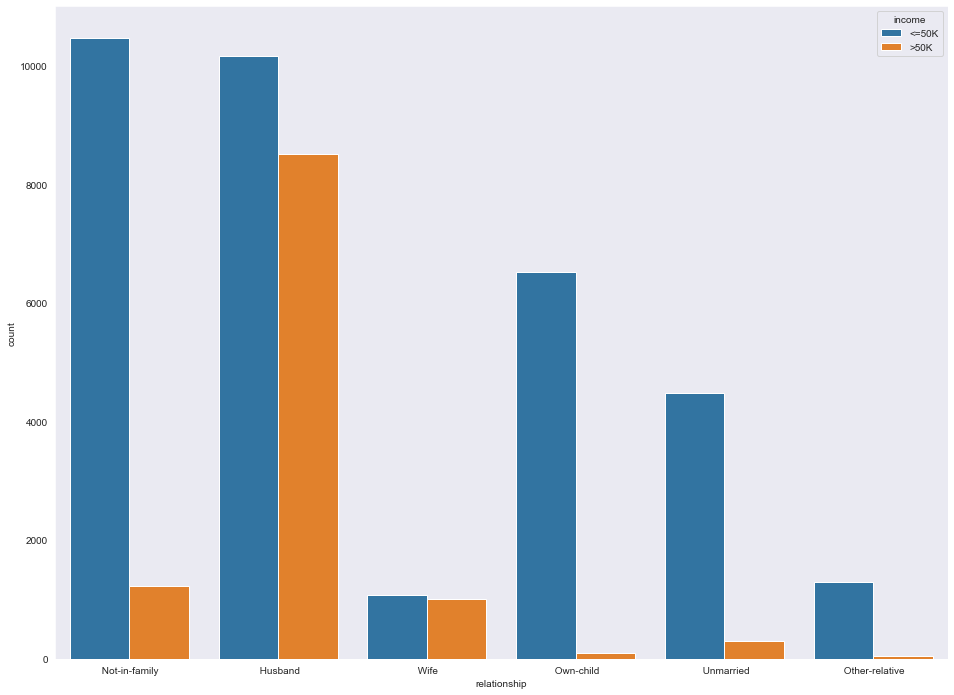

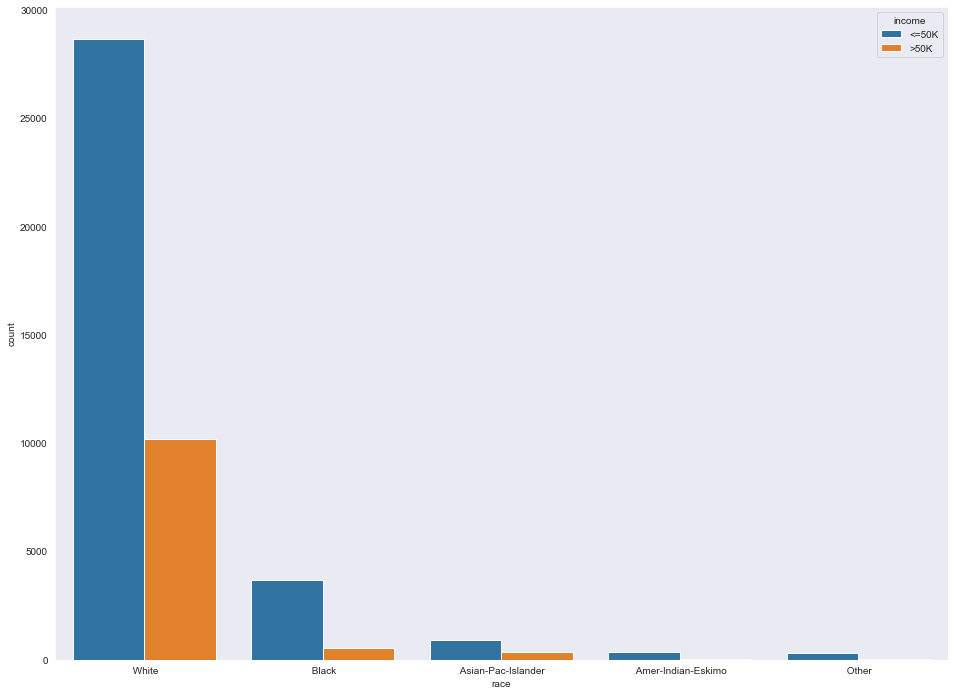

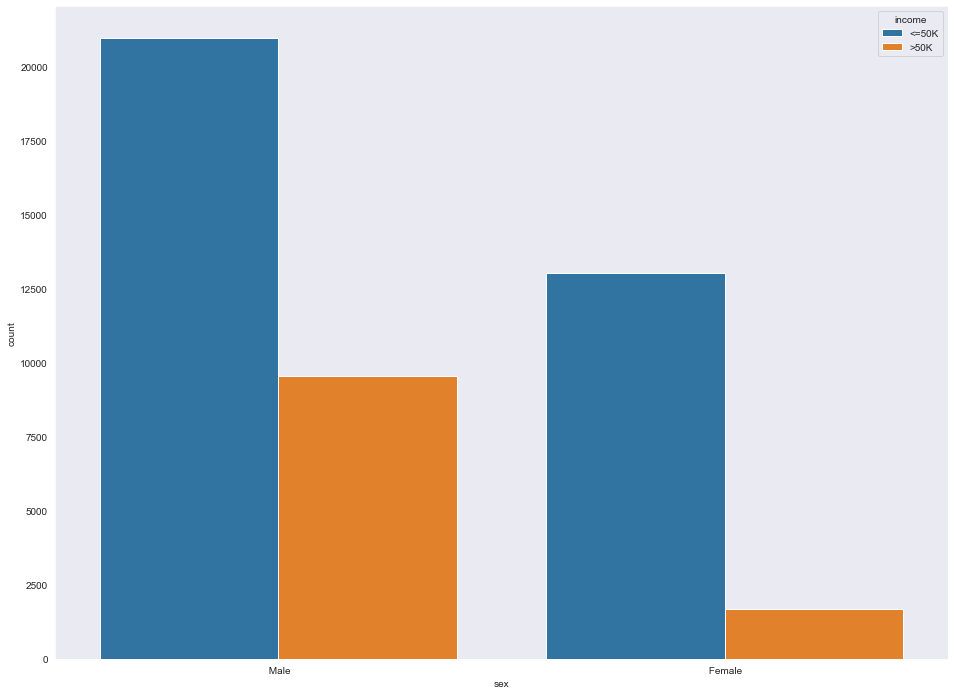

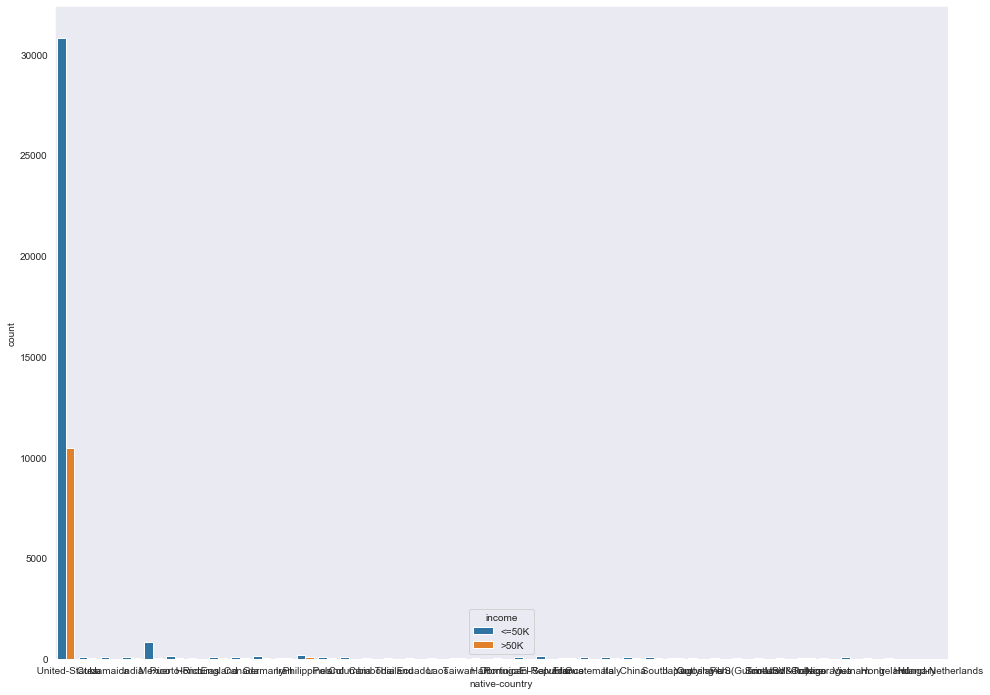

In [19]:
categorical_data =['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 
               'race', 'sex', 'native-country']
continues_data = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'education-num']

def plot(n):
    fig_dims = (16, 12)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.countplot(data = a, x= categorical_data[n], hue= 'income', ax = ax)
    
for i in range(len(categorical_data)):
    plot(i)


the plot of the   age is 
the plot of the   capital-gain is 
the plot of the   capital-loss is 
the plot of the   hours-per-week is 
the plot of the   education-num is 


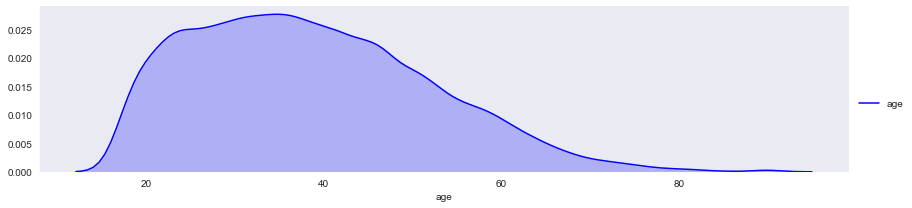

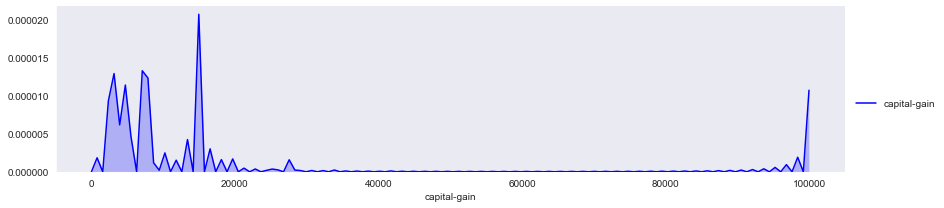

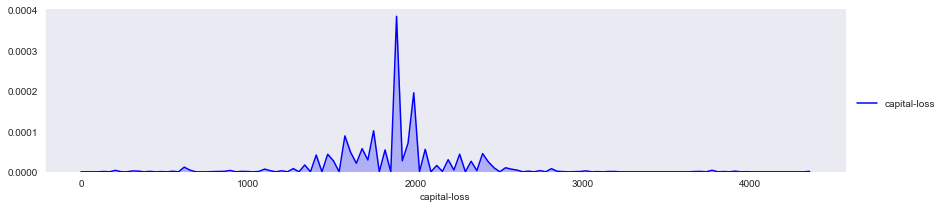

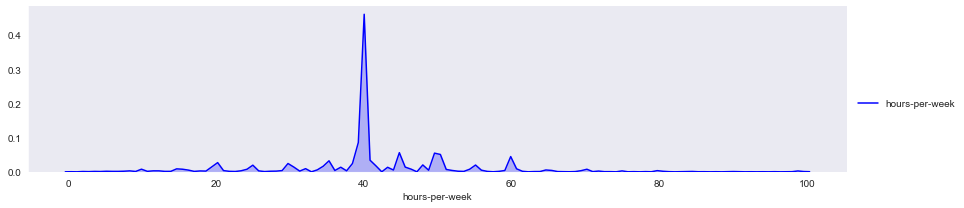

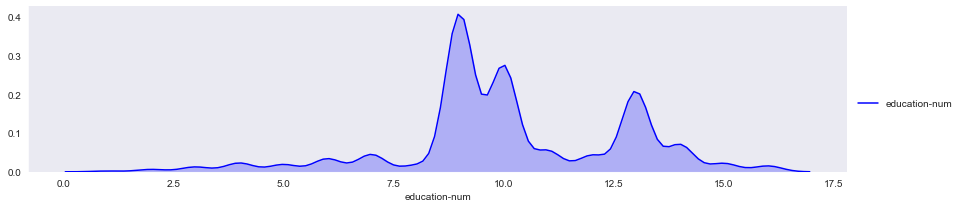

In [20]:
# visualising the continuous data 

for i in continues_data:
    print("the plot of the  ", i+ " is ")
    f = sns.FacetGrid(data=df,aspect =4)
    f.map(sns.kdeplot, i, shade = True , color = 'blue')
    f.add_legend()


the plot of the   capital-gain is 
the plot of the   capital-loss is 


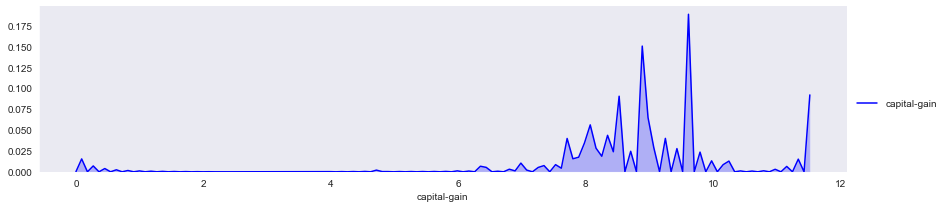

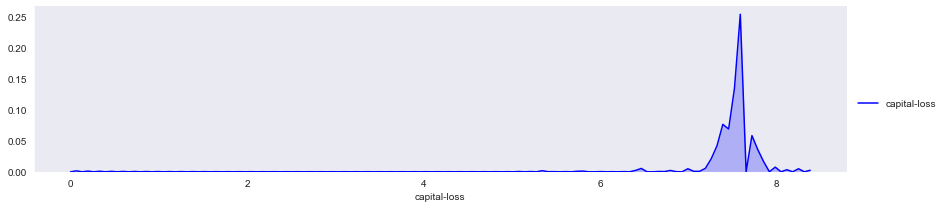

In [21]:
# capital gain and capital loss are highly skewed hence performing log transform 
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data =df  )
features_log_transformed[skewed] = df[skewed].apply(lambda x: np.log(x + 1))

for i in skewed:
    print("the plot of the  ", i+ " is ")
    f = sns.FacetGrid(data=df,aspect =4)
    f.map(sns.kdeplot, i, shade = True , color = 'blue')
    f.add_legend()

In [22]:
# more normalising the data that are numerical can mess up with the model  
from sklearn.preprocessing import MinMaxScaler
#intialsing scaler 
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_transformed[numerical] = scaler.fit_transform(features_log_transformed[numerical])

display(features_log_transformed.head())

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,<=50K


In [23]:
#one-hot-encoding data 
features_final = pd.get_dummies(features_log_minmax_transform.drop(['income'],1))

encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

103 total features after one-hot encoding.


In [24]:
print(encoded)

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', '

In [25]:
# shuffling and splitting data 
from sklearn.model_selection import train_test_split
income = df['income']
X_train, X_test, y_train, y_test = train_test_split(features_final, income , test_size = 0.2, random_state=0)

print("testing set has {} samples ".format(X_test.shape[0]))
print("training set has {} samples ". format(X_train.shape[0]))

testing set has 9045 samples 
training set has 36177 samples 


In [26]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score
model = GaussianNB()
model.fit(X_train, y_train)
a = model.predict(X_test)
accuracy_score(y_test, a)

0.5976782752902156

In [27]:
from sklearn.svm import SVC
model2 = SVC()
model2.fit(X_train, y_train)
b = model2.predict(X_test)
accuracy_score(y_test, b)


0.8371475953565506

In [50]:
model3 = KNeighborsClassifier()
model3.fit(X_train, y_train)
b = model3.predict(X_test)
accuracy_score(y_test, b)

0.8235489220563847

In [51]:
model4 = LogisticRegression(random_state=42)
model4.fit(X_train, y_train)
b = model4.predict(X_test)
accuracy_score(y_test, b)

0.841901603095633

In [52]:
model5 = RandomForestClassifier(random_state=45 , n_estimators= 100)
model5.fit(X_train, y_train)
b = model5.predict(X_test)
accuracy_score(y_test, b)


0.8407960199004975

In [53]:
model6 = GradientBoostingClassifier(n_estimators= 45, random_state= 100)
model6.fit(X_train, y_train)
b = model6.predict(X_test)
accuracy_score(y_test, b)

0.8583747927031509

In [54]:
model7 = AdaBoostClassifier(n_estimators= 45, random_state= 100)
model7.fit(X_train, y_train)
b = model7.predict(X_test)
accuracy_score(y_test, b)

0.8577114427860697

In [56]:
# choosing optimal model 
# going with the AdaboostClassifier
final_model = AdaBoostClassifier(n_estimators=1200,random_state= 33)
final_model.fit(X_train, y_train)
train = final_model.predict(X_train)


In [59]:
# getting the score 

In [ ]:
pip 